# Справочник класса LogisticRegressionModel
## Создание экземпляра класса

In [1]:
import pandas as pd
from scorekit.data import DataSamples
from scorekit.model import LogisticRegressionModel

ds = DataSamples(samples={'train': pd.read_csv('data/train_titanic.csv')}, target='Survived', result_folder='titanic_output')

logreg = LogisticRegressionModel(clf=None,            # классификатор модели (должен иметь метод fit() и атрибуты coef_, intercept_). При None выбирается SGDClassifier(alpha=0.001, loss='log', max_iter=100)
                                 transformer=None,    # объект класса WOE для предварительной трансформации факторов
                                 ds=None,             # Привязанный к модели ДатаСэмпл. Если задан, то он по умолчанию будет использоваться во всех методах
                                 round_digits=3,      # округление коэффициентов до этого кол-ва знаков после запятой   
                                 name=None,           # название модели
                                )   
logreg.load_model(file_name='data/titanic_model.json')# загрузка модели 
ds = logreg.transformer.transform(ds)                 # WOE-трансформация переменных

Selected features: ['PassengerId', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
Selected categorical features: ['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked']
Chosen model classifier is SGDClassifier(alpha=0.001, loss='log', random_state=0)
The model was loaded from file data/titanic_model.json
clf = LogisticRegression(C=1000, random_state=0, solver='saga')
coefs = {'Sex_WOE': -1.019, 'Pclass_WOE': -1.082, 'Age_WOE': -1.102, 'Embarked_WOE': -0.699}
intercept = -0.498
calibration = None
scale = None


## 1. Переменные

In [2]:
# классификатор модели (должен иметь метод fit() и атрибуты coef_, intercept_)
logreg.clf

LogisticRegression(C=1000, random_state=0, solver='saga')

In [3]:
# Привязанный ДатаСэмпл. Если задан, то он по умолчанию будет использоваться в остальных методах
logreg.ds

In [4]:
# трансформер (объект класса WOE)
logreg.transformer

In [5]:
#  округление коэффициентов до этого кол-ва знаков после запятой
logreg.round_digits

3

In [6]:
# название модели
logreg.name

In [7]:
# список перемнных модели
logreg.features

['Sex_WOE', 'Pclass_WOE', 'Age_WOE', 'Embarked_WOE']

In [8]:
# словарь коэффициентов
logreg.coefs

{'Sex_WOE': -1.019,
 'Pclass_WOE': -1.082,
 'Age_WOE': -1.102,
 'Embarked_WOE': -0.699}

In [9]:
# константа логрега
logreg.intercept

-0.498

In [10]:
# список коэффициентов для калибровки [a, b] 
# score_calibr = a + b*score
logreg.calibration

In [11]:
# словарь шкалы {грейд: верхняя граница PD грейда} 
'''
пример мастер-шкалы:
{
'MA1': 0.0005,
'MA2': 0.000695,
'MA3': 0.000976,
'MB1': 0.001372,
'MB2': 0.001927,
'MB3': 0.002708,
'MC1': 0.003804,
'MC2': 0.005344,
'MC3': 0.007508,
'MD1': 0.010549,
'MD2': 0.014821,
'MD3': 0.020822,
'ME1': 0.029254,
'ME2': 0.041101,
'ME3': 0.057744,
'MF1': 0.081128,
'MF2': 0.11398,
'MF3': 0.160137,
'MG1': 0.224984,
'MG2': 0.31609,
'MG3': 1
}
'''
logreg.scale

## 2. Методы

In [12]:
"""
Построение модели в автоматическом режиме с минимальным набором параметров
:param data: ДатаФрейм или ДатаСэмпл.
        - если передается ДатаФрейм, то он разбивается на трейн/тест 70%/30%
        - если передается ДатаСэмпл, то все параметры ниже можно не указывать
:param target: целевая переменная
:param time_column: дата среза
:param id_column: уникальный в рамках среза айди наблюдения
:param feature_descriptions: датафйрем с описанием переменных. Должен содержать индекс с названием переменных и любое кол-во полей с описанием, которые будут подтягиваться в отчеты
:param n_jobs: кол-во используемых рабочих процессов, при -1 берется число, равное CPU_LIMIT
:param result_folder: папка, в которую будут сохраняться все результаты работы
:param method: Метод автобиннинга: 'tree' - биннинг деревом, 'opt' - биннинг деревом с последующей оптимизацией границ бинов библиотекой optbinning
:param validate: флаг для выполнения валидацонных тестов
:param out: либо строка с названием эксель файла, либо объект pd.ExcelWriter для сохранения отчета
:param save_model: название json файла для сохранения модели
"""
data = ds
logreg.auto_logreg(data, target=None, time_column=None, id_column=None, feature_descriptions=None, n_jobs=None, 
                   result_folder='', method='opt', validate=False, out='auto_model.xlsx', save_model='auto_model.json')        


------------------------------------------------------------------------ SFA -------------------------------------------------------------------------

Using existing self.transformer.

------------------------------------------------------------------------ MFA -------------------------------------------------------------------------

Using existing self.coefs.
       train
Gini  70.714
Generating report...
The model was successfully saved to file titanic_output/auto_model.json


In [13]:
"""
Сохранение факторов, коэффициентов, калибровки, шкалы и биннинга в файл
:param file_name: название json файла для сохранения модели. При None json возвращается методом
"""
logreg.save_model(file_name='model.json')    

The model was successfully saved to file model.json


In [14]:
"""
Загрузка факторов, коэффициентов, калибровки, шкалы и биннинга из файла
:param file_name: название json файла или словарь для загрузки модели
"""
logreg.load_model(file_name='model.json')

The model was loaded from file model.json
clf = LogisticRegression(C=1000, random_state=0, solver='saga')
name = None
coefs = {'Sex_WOE': -1.019, 'Pclass_WOE': -1.082, 'Age_WOE': -1.102, 'Embarked_WOE': -0.699}
intercept = -0.498
calibration = None
scale = None
round_digits = 3



---------------------------------------------- Step 1 ----------------------------------------------
Dropped features with gini lower 5: []

---------------------------------------------- Step 2 ----------------------------------------------
Dropped correlated features: []

---------------------------------------------- Step 3 ----------------------------------------------
Stepwise feature selection started...
To add: Sex_WOE, gini: 53.393, p-value: 4.0158416459686157e-51
To add: Pclass_WOE, gini: 66.77, p-value: 1.2965480636638958e-19
To add: Age_WOE, gini: 69.697, p-value: 1.0529784646722601e-06
To add: Embarked_WOE, gini: 70.533, p-value: 0.001384300963047996
No significant features to add were found


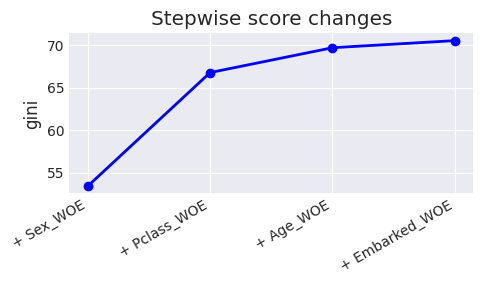


---------------------------------------------- Step 4 ----------------------------------------------
Dropping features with positive coefs and high p-values...
Nothing to drop

------------------------------------------- Final model --------------------------------------------
intercept = -0.502
coefs = {'Sex_WOE': -1.028, 'Pclass_WOE': -1.156, 'Embarked_WOE': -0.77, 'Age_WOE': -0.96}


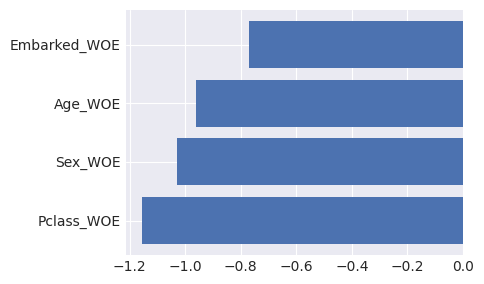

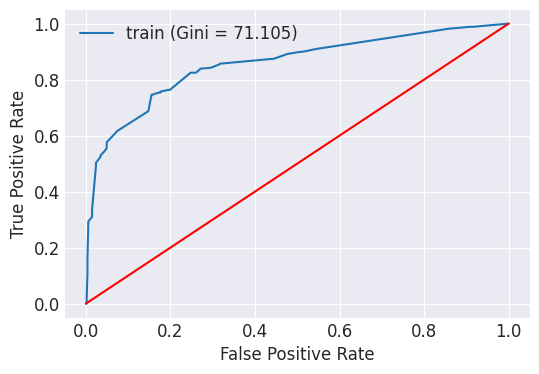

       train
Gini  71.105
Generating report...


In [15]:
"""
Многофакторный отбор. Проходит в 4 основных этапа:

1) Отбор по джини (исключаются все факторы с джини ниже gini_threshold)

2) Корреляционный анализ. Доступны два варианта работы:
    drop_with_most_correlations=False - итерационно исключается фактор с наименьшим джини из списка коррелирующих факторов
    drop_with_most_correlations=True - итерационно исключается фактор с наибольшим кол-вом коррелирующих с ним факторов

3) Итерационный отобор. Доступны три типа отбора:
    selection_type='forward' - все доступные факторы помещаются в список кандидатов, на каждом шаге из списка кандидатов определяется лучший* фактор и перемещается в модель
    selection_type='backward' - в модель включаются все доступные факторы, затем на каждом шаге исключается худший* фактор
    selection_type='stepwise' - комбинация 'forward' и 'backward'. Каждый шаг состоит из двух этапов:
            на первом из списка кандидатов отбирается лучший* фактор в модель,
            на втором из уже включенных факторов выбирается худший* и исключается

    *Определение лучшего фактора:
    При pvalue_priority=False лучшим фактором считается тот, который увеличивает метрику scoring модели на наибольшую величину.
        Если величина такого увеличения ниже score_delta, то лучший фактора не определяется, и добавления не происходит
    При pvalue_priority=True лучшим фактором считается фактор, который после добавления в модель имеет наименьшее p-value.
        Если величина этого p-value выше pvalue_threshold, то лучший фактора не определяется, и добавления не происходит

    *Определение худшего фактора:
    Худшим фактором в модели считается фактор с наибольшим p-value.
        Если величина этого p-value ниже pvalue_threshold, то худший фактора не определяется, и исключения не происходит

4) Если выставлен флаг drop_positive_coefs=True, то из списка отобранных на этапе 3 факторов итерационно
    исключаются факторы с положительными коэффициентами и факторы с p_value > pvalue_threshold
:param ds: ДатаСэмпл. В случае, если он не содержит трансформированные переменные, то выполняется трансформация трансформером self.transformer.
           При None берется self.ds
:param features: исходный список переменных для МФА. При None берутся все переменные, по которым есть активный биннинг
:param hold: список переменных, которые обязательно должны войти в модель
:param verbose: флаг для вывода подробных комментариев в процессе работы
:param gini_threshold: граница по джини для этапа 1
:param corr_method: метод расчета корреляций для этапа 2. Доступны варианты 'pearson', 'kendall', 'spearman'
:param corr_threshold: граница по коэффициенту корреляции для этапа 2
:param drop_with_most_correlations: вариант исключения факторов в корреляционном анализе для этапа 2
:param selection_type: тип отбора для этапа 3
:param pvalue_threshold: граница по p-value для этапа 3
:param pvalue_priority: вариант определения лучшего фактора для этапа 3
:param scoring: максимизируемая метрика для этапа 3.
        Варианты значений: 'gini', 'AIC', 'BIC' + все метрики доступные для вычисления через sklearn.model_selection.cross_val_score.
        Все информационные метрики после вычисления умножаются на -1 для сохранения логики максимизации метрики.
:param score_delta: минимальный прирост метрики для этапа 3
:param cv: параметр cv для вычисления скора sklearn.model_selection.cross_val_score для этапа 3.
            При None берется StratifiedKFold(5, shuffle=True, random_state=self.random_state)
:param drop_positive_coefs: флаг для выполнения этапа 4
:param result_file: файл, в который будут сохраняться результаты мфа
:param PSI: флаг для проведения анализа PSI отобранных в модель факторов
"""
logreg.mfa(ds=None, features=None, hold=None, verbose=True, gini_threshold=5,
           corr_method='pearson', corr_threshold=0.75, drop_with_most_correlations=False,
           selection_type='stepwise', pvalue_threshold=0.05, pvalue_priority=False,
           scoring='gini', score_delta=0.1, cv=None, drop_positive_coefs=True,
           result_file='mfa.xlsx', PSI=True)

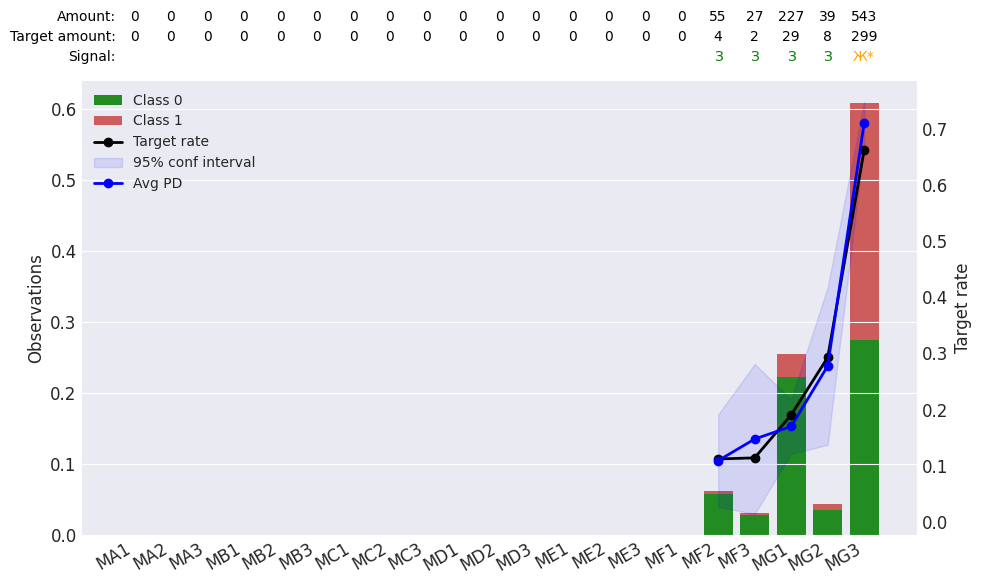

[0.78125, 1.00038]

In [16]:
"""
Калибровка скора модели линейной функцией score_calibr = a + b*score. Результат сохраняется в self.calibration в виде списка [a, b]
:param CT: значение центральной тенденции, к которому приводится среднее PD модели
:param ds: ДатаСэмпл
:param method: метод калибровки. Доступны два варианта:
                0 - Строится логрег скора на таргет, коэффициент b приравнивается полученному коэффициенту при скоре,
                    коэффицент a затем подбирается солвером для попадания в ЦТ при фиксированном b
                1 - Расчитываются веса наблюдений и строится логрег скора на таргет с весами, a и b приравниваются коэффициентам логрега
                2 - Коэффициенты рассчитываются минимизацией заданной функции через вызов scipy.optimize.minimize(fun=fun, x0=x0, args=args, method='nelder-mead')
                любое другое значение - перерасчет коэффициентов не происходит, проводится тест на коэффициентах из self.calibration
:param sample_name: название сэмпла, на котором проводится калибровка
:param scale: шкала, на которой будет проведен биноминальный тест. Задается в виде словаря {грейд: верхняя граница PD грейда}. По умолчанию берется мастер-шкала
:param score_field: поле со скором. Если оно отсутвует в ДатаСэмпле, то будет вызван метод self.scoring
:param result_file: название эксель файла, в который будут записаны результаты
:param plot_flag: флаг для вывода графика
--- Метод калибровки 2 ---
:param fun: пользовательская функция
:param x0: начальные значения параметров
:param args: кортеж аргументов
:param lambda_ab: функция для формирования списка [a, b] из результирующих параметров солвера. При None берется lambda x: x
Примеры использования для калибровки с ограничением минимального PD модели значением minPD:

Вариант 1) Минимизация функции двух переменных
def CT_minPD_delta(params, score, CT, minPD):
    a, b = params
    pd = 1 / (1 + np.exp(-(a + score * b)))
    return (CT - pd.mean()) ** 2 + 10 * (minPD - pd.min())**2

fun=CT_minPD_delta, x0=[0, 1], args=(ds.samples[ds.train_name]['score'], CT, minPD), lambda_ab=None

Вариант 2) Минимизация функции одной переменной, вычисление коэффициента b через связь minPD и лучшего скора по выборке
def CT_delta(params, score, CT, minPD, best_score):
    a = params
    b = (-log(1 / minPD - 1) - a) / best_score
    pd = 1 / (1 + np.exp(-(a + score * b)))
    return (CT - pd.mean()) ** 2

best_score = ds.samples[ds.train_name]['score'].min()
fun=CT_delta, x0=0, args=(ds.samples[ds.train_name]['score'], CT, minPD, best_score), lambda_ab=lambda x: (x[0], (-log(1 / minPD - 1) - x[0]) / best_score))


:return: коэффициенты калибровки [a, b]
"""
CT = 0.5
logreg.calibrate(CT, ds=None, method=0, sample_name=None, scale=None, score_field=None, result_file='calibration.xlsx', plot_flag=True, fun=None, x0=None, args=None, lambda_ab=None)

In [17]:
"""
Тест на калибровку
:param df: ДатаФрейм
:param target: поле с таргетом
:param pd_field: поле с рассчитанным PD
:param w: вес дефолтных наблюдений для теста

:return: ДатаФрейм с результатом теста
"""
df = ds.samples[ds.train_name]
target = ds.target
pd_field = 'score'
df = logreg.scoring(df)
logreg.calibration_test(df, target, pd_field, w=1)        

,upper PD,Avg PD,Target rate,Amount,Target amount,Amount weighted,Target amount weighted,1%,5%,95%,99%,Signal
grade,,,,,,,,,,,,
MA1,5.000e-04,-1.825,0.159,552,88,552,88,-2.074,-2.014,-1.636,-1.576,К
MA2,6.950e-04,NaN,NaN,0,0,0,0,NaN,NaN,NaN,NaN,
MA3,9.760e-04,NaN,NaN,0,0,0,0,NaN,NaN,NaN,NaN,
MB1,1.372e-03,NaN,NaN,0,0,0,0,NaN,NaN,NaN,NaN,
MB2,1.927e-03,NaN,NaN,0,0,0,0,NaN,NaN,NaN,NaN,
MB3,2.708e-03,NaN,NaN,0,0,0,0,NaN,NaN,NaN,NaN,
MC1,3.804e-03,NaN,NaN,0,0,0,0,NaN,NaN,NaN,NaN,
MC2,5.344e-03,NaN,NaN,0,0,0,0,NaN,NaN,NaN,NaN,
MC3,7.508e-03,NaN,NaN,0,0,0,0,NaN,NaN,NaN,NaN,


In [18]:
"""
Тест Вальда. Вычисление стандартной ошибки, Wald Chi-Square и p-value для всех коэффициентов модели на заданном ДатаСэмпле
:param ds: ДатаСэмпл. При None берется self.ds
:param sample_name: название сэмпла. При None берется ds.train_sample
:param clf: модель (объект класса LogisticRegression)
:param features: список переменных
:param fit: флаг для обучения модели заново на текущих данных

:return: дафрейм с полями 'feature', 'coefficient', 'se', 'wald', 'p-value'
"""         
logreg.wald_test(ds=None, sample_name=None, clf=None, features=None, fit=False)        

,feature,coefficient,se,wald,p-value
0,intercept,-0.502,0.089,31.502,1.992e-08
1,Sex_WOE,-1.028,0.074,193.407,5.736e-44
2,Pclass_WOE,-1.156,0.131,78.388,8.467e-19
3,Embarked_WOE,-0.770,0.241,10.213,1.395e-03
4,Age_WOE,-0.960,0.187,26.433,2.729e-07


In [19]:
"""
Отбор факторов на основе регуляризации - строится модель на всех переменных, затем итерационно исключаются
переменные с нулевыми или положительными коэффициентами и низкой значимостью
:param ds: ДатаСэмпл. При None берется self.ds
:param features: исходный список переменных. При None берется self.features
:param hold: список переменных, которые обязательно должны остаться после отбора
:param scoring: расчитываемый скор модели
:param pvalue_threshold: граница значимости по p-value
:param verbose: флаг для вывода подробных комментариев в процессе работы

:return: кортеж (итоговый список переменных, график со скором в процессе отбора в виде объекта plt.figure)
"""    
logreg.regularized_selection(ds=None, features=None, hold=None, scoring='gini', pvalue_threshold=0.05, verbose=False)        

(['Sex_WOE', 'Pclass_WOE', 'Embarked_WOE', 'Age_WOE'], None)

(['Age_WOE', 'Embarked_WOE', 'Pclass_WOE', 'Sex_WOE'],
 <Figure size 500x300 with 1 Axes>)

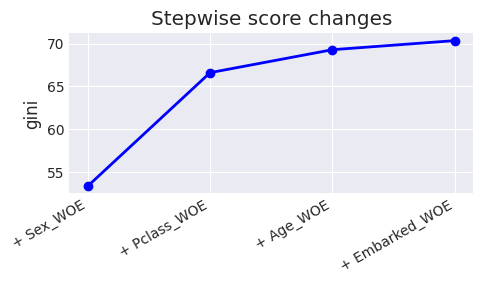

In [20]:
"""
Итерационный отобор. Доступны три типа отбора:
    selection_type='forward' - все доступные факторы помещаются в список кандидатов, на каждом шаге из списка кандидатов определяется лучший* фактор и перемещается в модель
    selection_type='backward' - в модель включаются все доступные факторы, затем на каждом шаге исключается худший* фактор
    selection_type='stepwise' - комбинация 'forward' и 'backward'. Каждый шаг состоит из двух этапов:
            на первом из списка кандидатов отбирается лучший* фактор в модель,
            на втором из уже включенных факторов выбирается худший* и исключается

    *Определение лучшего фактора:
    При pvalue_priority=False лучшим фактором считается тот, который увеличивает метрику scoring модели на наибольшую величину.
        Если величина такого увеличения ниже score_delta, то лучший фактора не определяется, и добавления не происходит
    При pvalue_priority=True лучшим фактором считается фактор, который после добавления в модель имеет наименьшее p-value.
        Если величина этого p-value выше pvalue_threshold, то лучший фактора не определяется, и добавления не происходит

    *Определение худшего фактора:
    Худшим фактором в модели считается фактор с наибольшим p-value.
        Если величина этого p-value ниже pvalue_threshold, то худший фактора не определяется, и исключения не происходит
:param ds: ДатаСэмпл. При None берется self.ds
:param verbose: флаг для вывода подробных комментариев в процессе работы
:param selection_type: тип отбора. Варианты 'forward', 'backward', 'stepwise'
:param features: исходный список переменных. При None берется self.features
:param hold: список переменных, которые обязательно должны остаться после отбора
:param score_delta: минимальный прирост метрики
:param scoring: максимизируемая метрика.
        Варианты значений: 'gini', 'AIC', 'BIC', 'SIC', 'SBIC' + все метрики доступные для вычисления через sklearn.model_selection.cross_val_score.
        Все информационные метрики после вычисления умножаются на -1 для сохранения логики максимизации метрики.
:param pvalue_threshold: граница значимости по p-value
:param pvalue_priority: вариант определения лучшего фактора

:return: кортеж (итоговый список переменных, график со скором в процессе отбора в виде объекта plt.figure)
"""
logreg.stepwise_selection(ds=None, verbose=False, selection_type='stepwise', features=None, hold=None, 
                          score_delta=0.01, scoring='gini', pvalue_threshold=0.05, pvalue_priority=False)       

In [21]:
"""
Обучение модели
:param ds: ДатаСэмпл. При None берется self.ds
:param sample_name: название сэмпла на котором проводится обучение. При None берется ds.train_sample
:param features: список переменных. При None берется self.features
"""
logreg.fit(ds=None, sample_name=None, features=None)        

intercept = -0.502
coefs = {'Sex_WOE': -1.028, 'Pclass_WOE': -1.156, 'Embarked_WOE': -0.77, 'Age_WOE': -0.96}


In [22]:
"""
Расчет информационного критерия модели на заданной выборке
:param ds: ДатаСэмпл. При None берется self.ds
:param sample_name: название сэмпла. При None берется ds.train_sample
:param clf: модель (объект класса LogisticRegression). При None берется self.model
:param features: список переменных. При None берется self.features
:param criterion: критерий для расчета. Доступны варианты 'AIC', 'BIC'
:return: значение заданного криетрия
"""
logreg.inf_criterion(ds=None, sample_name=None, clf=None, features=None, criterion='AIC')        

801.3235704358257

In [23]:
"""
Вычисление скора модели на заданной выборке
:param ds: ДатаСэмпл. При None берется self.ds
:param sample_name: название сэмпла. При None берется ds.train_sample
:param clf: модель (объект класса LogisticRegression). При None берется self.model
:param cv: параметр cv для вычисления скора sklearn.model_selection.cross_val_score
:param scoring: рассчитываемый скор. Варианты значений: 'gini', 'AIC', 'BIC' + все метрики доступные для вычисления через sklearn.model_selection.cross_val_score
:param features: список переменных. При None берется self.features
:param fit: флаг для обучения модели заново на текущих данных

:return: рассчитанный скор
"""
logreg.get_score(ds=None, sample_name=None, clf=None, cv=5, scoring='gini', features=None, fit=True)        

70.341

In [24]:
"""
Скоринг выборки.
:param data: ДатаСэмпл или ДатаФрейм. Возвращается объект того же типа
:param score_field: поле, в которое должен быть записан посчитанный скор
:param pd_field: поле, в которое должен быть записан посчитанный PD
:param scale_field: поле, в которое должен быть записан посчитанный грейд

:return: ДатаСэмпл или ДатаФрейм с добавленными полями скоров, PD и грейда
"""
logreg.scoring(data=ds, score_field='score', pd_field='pd', scale_field=None)        

In [25]:
"""
Генерация хардкода функции scoring
:param file_name: название питоновского файла, куда должен быть сохранен код
:param score_field: поле, в которое должен быть записан посчитанный скор
:param pd_field:  поле, в которое должен быть записан посчитанный PD
:param scale_field:  поле, в которое должен быть записан посчитанный грейд
"""
logreg.to_py(file_name='model.py', score_field='score', pd_field='pd', scale_field=None)        

The model code for implementation saved to file titanic_output/model.py
import pandas as pd
import numpy as np


def scoring(df, score_field='score', pd_field='pd', scale_field=None):
    """
    Функция скоринга выборки
    Arguments:
        df: [pd.DataFrame] входной ДатаФрейм, должен содержать все нетрансформированные переменные модели
        score_field: [str] поле, в которое должен быть записан посчитанный скор
        pd_field: [str] поле, в которое должен быть записан посчитанный PD
        scale_field: [str] поле, в которое должен быть записан посчитанный грейд
    Returns:
        df: [pd.DataFrame] выходной ДатаФрейм с добавленными полями трансформированных переменных, скоров, PD и грейда
    """

    df['Sex_WOE'] = np.where(df['Sex'].isin(['female']), -1.573, 
                             np.where(df['Sex'].isin(['male']), 0.989, 
                                      -1.573))
    df['Pclass_WOE'] = np.where(df['Pclass'].isin([1]), -1.043, 
                               

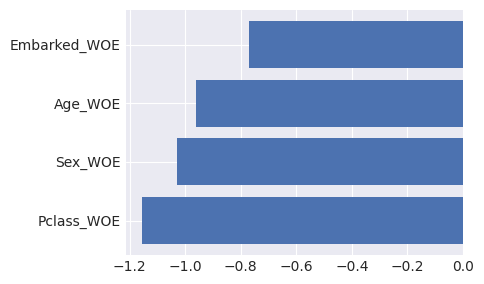

In [26]:
"""
Отрисовка гистограммы коэффициентов модели
:param filename: название файла для сохранения
"""
logreg.draw_coefs(filename=None)        

In [27]:
"""
Валидационные тесты модели на заданном ДатаСэмпле библиотекой bankmetrics
:param ds: ДатаСэмпл
:param result_file: результирующий эксель файл
:param score_field: поле со расчитанным скор (при отсутcnвии этого поля в выборке будет вызван метод self.scoring)
:param pd_field: поле с расчитанным PD
:param scale_field: поле с расчитанным грейдом
"""
logreg.validate(ds=None, result_file='validation.xlsx', score_field='score', pd_field='pd', scale_field=None)

IV...
Тест Колмогорова-Смирнова...
Джини...
Калибровка...
Корреляция...
VIF...
WOE...
Results of validation tests was saved to file titanic_output/validation.xlsx


In [28]:
"""
Вычисление вероятности целевого события
:param ds: ДатаСэмпл
:param sample_name: название сэмпла для вычисление. При None берется ds.train_sample

:return: np.array вероятностей
"""
logreg.predict_proba(ds=None, sample_name=None)        

array([0.08280133, 0.94683437, 0.55696559, 0.89664886, 0.08280133,
       0.07339375, 0.27881967, 0.32610827, 0.55696559, 0.88176423,
       0.87078259, 0.84335581, 0.08280133, 0.08280133, 0.55696559,
       0.6927365 , 0.40647184, 0.13922378, 0.55696559, 0.61537334,
       0.20690685, 0.20690685, 0.64017551, 0.38385818, 0.55696559,
       0.55696559, 0.10305054, 0.38385818, 0.52449188, 0.05300237,
       0.56118581, 0.91695167, 0.52449188, 0.13933887, 0.56118581,
       0.38385818, 0.10305054, 0.08280133, 0.55696559, 0.72072003,
       0.55696559, 0.78415802, 0.10305054, 0.97559558, 0.64017551,
       0.05300237, 0.07339375, 0.52449188, 0.10305054, 0.55696559,
       0.08280133, 0.08280133, 0.94683437, 0.78415802, 0.44246991,
       0.27862667, 0.78415802, 0.15634217, 0.95115867, 0.08280133,
       0.15634217, 0.94683437, 0.38385818, 0.32610827, 0.4422331 ,
       0.10305054, 0.78415802, 0.08280133, 0.55696559, 0.08280133,
       0.20690685, 0.55696559, 0.20690685, 0.15634217, 0.08280

In [29]:
"""
Генерация отчета по обученной модели.
:param ds: ДатаСэмпл. В случае, если он не содержит трансформированные переменные, то выполняется трансформация трансформером self.transformer
:param out: либо строка с названием эксель файла, либо объект pd.ExcelWriter для вывода результата
:param sheet_name: название листа в экселе
:param pvalue_threshold: граница по p-value. Используется только для выделения значений p-value цветом
:param PSI: флаг проведение тестов PSI
:param verbose: флаг вывода комментариев в процессе работы
"""
logreg.report(ds=None, out='report.xlsx', sheet_name='model', pvalue_threshold=0.05, PSI=False, verbose=False)        

       train
Gini  71.105
Generating report...


In [ ]:
"""
Выполняет отбо факторов методом autobinary.AutoSelection. На отоборанных факторах строится модель на бустинге и логреге.
Если self.transformer не задан, то для отобранных факторов дополнительно делается автобиннинг
:param ds: ДатаСэмпл с нетрансформированными переменными
:param selection_type: тип отбора. Варианты 'forward', 'backward', 'deep_backward'
:param model_type: тип модели для классификации. Варианты 'xgboost', 'lightboost', 'catboost'
:param result_file: файл, в который будут сохраняться результаты
:param plot_pdp: флаг для построение графиков PDP. Нужна библиотека pdpbox
:param verbose: флаг вывода комментариев в процессе работы
"""
ds = DataSamples(samples={'train': pd.read_csv('data/train_titanic.csv')}, target='Survived', result_folder='titanic_output')
logreg.tree_selection(ds=ds, selection_type='forward', model_type='xgboost', result_file='tree_selection.xlsx', plot_pdp=False, verbose=False)        